# Análisis de Dataset de Películas de Superhéroes

## Introducción

Este notebook está diseñado para analizar un dataset de películas de superhéroes icónicas. Incluye análisis de sentimiento, comparativas y visualizaciones.

## Instrucciones de uso

1. Ejecuta las celdas en orden secuencial
2. Cuando se te solicite, sube los archivos CSV del dataset
3. Sigue las instrucciones en cada sección
4. Drive: https://drive.google.com/drive/folders/139TQJNUkKCcgKRS4yPPhTbF2KT5gY98d?usp=sharing


## 1. Configuración inicial

Instalacion de las bibliotecas necesarias:

In [ ]:
# Instalación de bibliotecas necesarias
!pip install wordcloud matplotlib pandas numpy seaborn
!pip install -q pandas numpy matplotlib seaborn wordcloud spacy scikit-learn tensorflow

In [ ]:
# Instalación de bibliotecas
!pip install -q pandas numpy matplotlib seaborn wordcloud spacy scikit-learn tensorflow

# Importacion de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import matplotlib
import string
from collections import Counter
import os
from google.colab import files
import io

# Verificacion de que las bibliotecas se importaron correctamente
print("✅ Pandas versión:", pd.__version__)
print("✅ NumPy versión:", np.__version__)
print("✅ Matplotlib versión:", matplotlib.__version__)
print("✅ Seaborn versión:", sns.__version__)

# Descarga modelos de lenguaje de spaCy (inglés y español)
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

# NLP y ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

# Importar WordCloud (puede fallar si no se instaló correctamente)
try:
    from wordcloud import WordCloud
    print("✅ WordCloud importado correctamente")
except ImportError:
    print("❌ Error al importar WordCloud. Ejecuta la celda de instalación nuevamente.")

# Configuración de visualización
plt.style.use('default')  # Estilo más compatible
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

✅ Pandas versión: 2.2.2
✅ NumPy versión: 2.0.2
✅ Matplotlib versión: 3.10.0
✅ Seaborn versión: 0.13.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 94.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ WordCloud importado correctamente


In [ ]:
# Carga modelos de spaCy
import spacy # Importar la biblioteca spacy

try:
    nlp_en = spacy.load("en_core_web_sm")
    nlp_es = spacy.load("es_core_news_sm")
    print("✅ Modelos de spaCy cargados correctamente (en, es)")
except OSError:
    print("❌ Error al cargar modelos de spaCy. Ejecuta la celda de instalación/descarga nuevamente.")

# Configuración de visualización
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

✅ Modelos de spaCy cargados correctamente (en, es)


In [ ]:
import pandas as pd
from google.colab import files
import io # Importante para leer archivos en memoria

def load_data_from_files():

    print("Por favor, sube los archivos CSV del dataset:")
    print("1. superhero_movies_basic_info.csv (información básica de películas)")
    print("2. superhero_movies_all_reviews.csv (reseñas)")

    try:
        # Solicita la carga de archivos
        uploaded = files.upload()

        # Nombrede los archivos a subir
        basic_info_base_name = 'superhero_movies_basic_info'
        reviews_base_name = 'superhero_movies_all_reviews'

        # Variables que guardan los nombres de los archivos subidos
        info_filename = None
        reviews_filename = None

        # Bucle para encontrar los nombres  de los archivos, aunque Colab los renombre
        for filename in uploaded.keys():
            if basic_info_base_name in filename:
                info_filename = filename
            if reviews_base_name in filename:
                reviews_filename = filename

        # Verifica si encontramos ambos archivos
        if info_filename and reviews_filename:
            print(f"\n✅ Archivos encontrados: '{info_filename}' y '{reviews_filename}'")

            # Carga datos desde los archivos subidos
            df_movies = pd.read_csv(io.BytesIO(uploaded[info_filename]))
            df_reviews = pd.read_csv(io.BytesIO(uploaded[reviews_filename]))

            print(f"✅ Datos cargados correctamente: {len(df_movies)} películas y {len(df_reviews)} reseñas")
            return df_movies, df_reviews, True
        else:
            # Si no se encontraron los archivos, muestra error y devuelve none
            print("\n❌ Error: No se subieron los archivos necesarios.")
            print("Asegúrate de subir un archivo que contenga 'superhero_movies_basic_info' y otro con 'superhero_movies_all_reviews'.")
            return None, None, False

    except Exception as e:
        # Este error ocurre si se cancela la subida
        print(f"\n❌ Ocurrió un error durante la carga: {e}")
        return None, None, False

#  Carga datos y verifica el resultado
df_movies, df_reviews, using_real_data = load_data_from_files()



Por favor, sube los archivos CSV del dataset:
1. superhero_movies_basic_info.csv (información básica de películas)
2. superhero_movies_all_reviews.csv (reseñas)


Saving superhero_movies_basic_info.csv to superhero_movies_basic_info (2).csv
Saving superhero_movies_all_reviews.csv to superhero_movies_all_reviews (2).csv

✅ Archivos encontrados: 'superhero_movies_basic_info (2).csv' y 'superhero_movies_all_reviews (2).csv'
✅ Datos cargados correctamente: 5 películas y 298 reseñas


In [ ]:
# Verifica que los DataFrames existen y tienen datos
if 'df_movies' not in locals() or 'df_reviews' not in locals():
    print("❌ Error: Los DataFrames no están definidos. Usando datos de ejemplo.")
    df_movies, df_reviews = sample_movies, sample_reviews


In [ ]:
# Información básica de las películas
print("Información básica de las películas:")
display(df_movies.head())

Información básica de las películas:


,title,year,universe,director,imdb_rating,rt_critics,rt_audience,metacritic,worldwide_box_office,runtime,release_date
0,Avengers: Endgame,2019,Marvel,"Anthony Russo, Joe Russo",8.4,94,90,78,2.798 mil millones USD,181 minutos,26 de abril de 2019
1,The Dark Knight,2008,DC,Christopher Nolan,9.0,94,94,84,1.005 mil millones USD,152 minutos,18 de julio de 2008
2,Spider-Man: Into the Spider-Verse,2018,Marvel,"Bob Persichetti, Peter Ramsey, Rodney Rothman",8.4,97,93,87,375.5 millones USD,117 minutos,14 de diciembre de 2018
3,Black Panther,2018,Marvel,Ryan Coogler,7.3,96,79,88,1.347 mil millones USD,134 minutos,16 de febrero de 2018
4,Wonder Woman,2017,DC,Patty Jenkins,7.4,93,83,76,821.8 millones USD,141 minutos,2 de junio de 2017


In [ ]:
# Estadísticas descriptivas
print("\nEstadísticas de puntuaciones:")
display(df_movies[['imdb_rating', 'rt_critics', 'rt_audience', 'metacritic']].describe())



Estadísticas de puntuaciones:


,imdb_rating,rt_critics,rt_audience,metacritic
count,5.000000,5.000000,5.000000,5.000000
mean,8.100000,94.800000,87.800000,82.600000
std,0.728011,1.643168,6.534524,5.366563
min,7.300000,93.000000,79.000000,76.000000
25%,7.400000,94.000000,83.000000,78.000000
50%,8.400000,94.000000,90.000000,84.000000
75%,8.400000,96.000000,93.000000,87.000000
max,9.000000,97.000000,94.000000,88.000000


In [ ]:
# Distribución de películas por universo
print("\nDistribución por universo:")
universe_counts = df_movies['universe'].value_counts()
display(universe_counts)


Distribución por universo:


,count
universe,
Marvel,3
DC,2


In [ ]:
# Muestra de reseñas
print("\nMuestra de reseñas:")
display(df_reviews.head())


Muestra de reseñas:


,movie_title,year,universe,source,rating,date,text,language,sentiment
0,Avengers: Endgame,2019,Marvel,IMDb,4.0,2019-01-16,Una conclusión épica que hace justicia a todos...,es,positiva
1,Avengers: Endgame,2019,Marvel,IMDb,2.0,2019-11-06,Obra maestra del cine de superhéroes. La narra...,en,positiva
2,Avengers: Endgame,2019,Marvel,IMDb,6.0,2019-07-10,Una conclusión épica que hace justicia a todos...,es,positiva
3,Avengers: Endgame,2019,Marvel,IMDb,3.0,2019-11-24,"Cumple con lo esperado, ni más ni menos. Buena...",en,neutral
4,Avengers: Endgame,2019,Marvel,IMDb,4.0,2019-01-24,Superó todas mis expectativas. Los momentos em...,es,positiva


In [ ]:
# Distribución de sentimientos
print("\nDistribución de sentimientos:")
sentiment_counts = df_reviews['sentiment'].value_counts()
display(sentiment_counts)


Distribución de sentimientos:


,count
sentiment,
positiva,163
negativa,111
neutral,24


Análisis de sentimiento por película

<Figure size 1200x800 with 0 Axes>

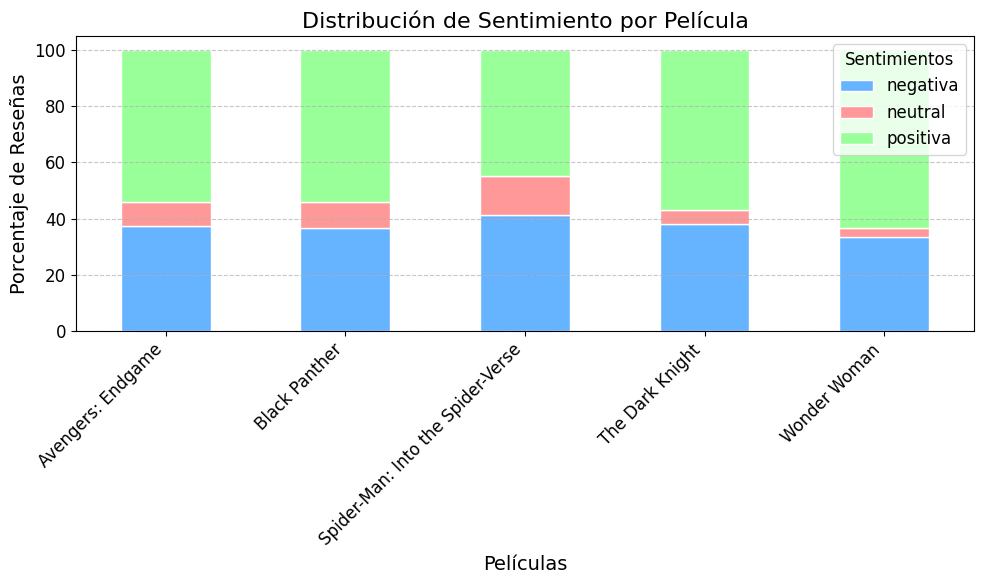


Porcentajes de sentimiento por película:


sentiment,negativa,neutral,positiva
movie_title,,,
Avengers: Endgame,37.3,8.5,54.2
Black Panther,36.5,9.5,54.0
Spider-Man: Into the Spider-Verse,41.4,13.8,44.8
The Dark Knight,37.9,5.2,56.9
Wonder Woman,33.3,3.3,63.3


In [ ]:
# Función para crear gráfico de sentimiento
def plot_sentiment_distribution(df):
    try:
        # Agrupa por película y sentimiento
        sentiment_by_movie = df.groupby(['movie_title', 'sentiment']).size().unstack(fill_value=0)

        # Verifica de que todas las columnas existan
        for col in ['positiva', 'negativa', 'neutral']:
            if col not in sentiment_by_movie.columns:
                sentiment_by_movie[col] = 0

        # Calcula porcentajes
        sentiment_percentages = sentiment_by_movie.div(sentiment_by_movie.sum(axis=1), axis=0) * 100

        # Crea gráfico de barras apiladas
        plt.figure(figsize=(12, 8))
        sentiment_percentages.plot(kind='bar', stacked=True,
                                  color=['#66b3ff', '#ff9999', '#99ff99'],
                                  edgecolor='white')
        plt.title('Distribución de Sentimiento por Película', fontsize=16)
        plt.xlabel('Películas', fontsize=14)
        plt.ylabel('Porcentaje de Reseñas', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(title='Sentimientos')
        plt.tight_layout()
        plt.show()

        return sentiment_percentages
    except Exception as e:
        print(f"❌ Error al crear gráfico de sentimiento: {e}")
        return None

# Crea gráfico de sentimiento
sentiment_percentages = plot_sentiment_distribution(df_reviews)

# Mostra porcentajes
if sentiment_percentages is not None:
    print("\nPorcentajes de sentimiento por película:")
    display(sentiment_percentages.round(1))

Comparativa de puntuaciones por fuente

<Figure size 1400x800 with 0 Axes>

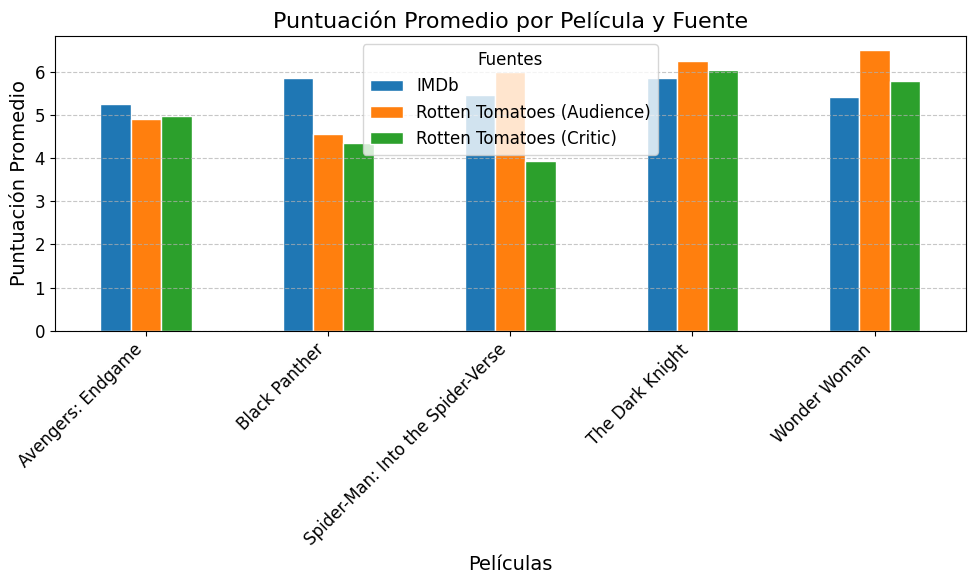


Puntuaciones promedio por película y fuente:


source,IMDb,Rotten Tomatoes (Audience),Rotten Tomatoes (Critic)
movie_title,,,
Avengers: Endgame,5.3,4.9,5.0
Black Panther,5.9,4.5,4.3
Spider-Man: Into the Spider-Verse,5.4,6.0,3.9
The Dark Knight,5.8,6.2,6.0
Wonder Woman,5.4,6.5,5.8


In [ ]:
# Función para crear gráfico de puntuaciones
def plot_ratings_comparison(df):
    try:
        # Crea un dataframe con las puntuaciones promedio por película y fuente
        avg_ratings = df.groupby(['movie_title', 'source'])['rating'].mean().unstack()

        # Crea gráfico de barras
        plt.figure(figsize=(14, 8))
        avg_ratings.plot(kind='bar', edgecolor='white')
        plt.title('Puntuación Promedio por Película y Fuente', fontsize=16)
        plt.xlabel('Películas', fontsize=14)
        plt.ylabel('Puntuación Promedio', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(title='Fuentes')
        plt.tight_layout()
        plt.show()

        return avg_ratings
    except Exception as e:
        print(f"❌ Error al crear gráfico de puntuaciones: {e}")
        return None

# Crea gráfico de puntuaciones
avg_ratings = plot_ratings_comparison(df_reviews)

# Muestra puntuaciones promedio
if avg_ratings is not None:
    print("\nPuntuaciones promedio por película y fuente:")
    display(avg_ratings.round(1))

Comparativa de métricas oficiales

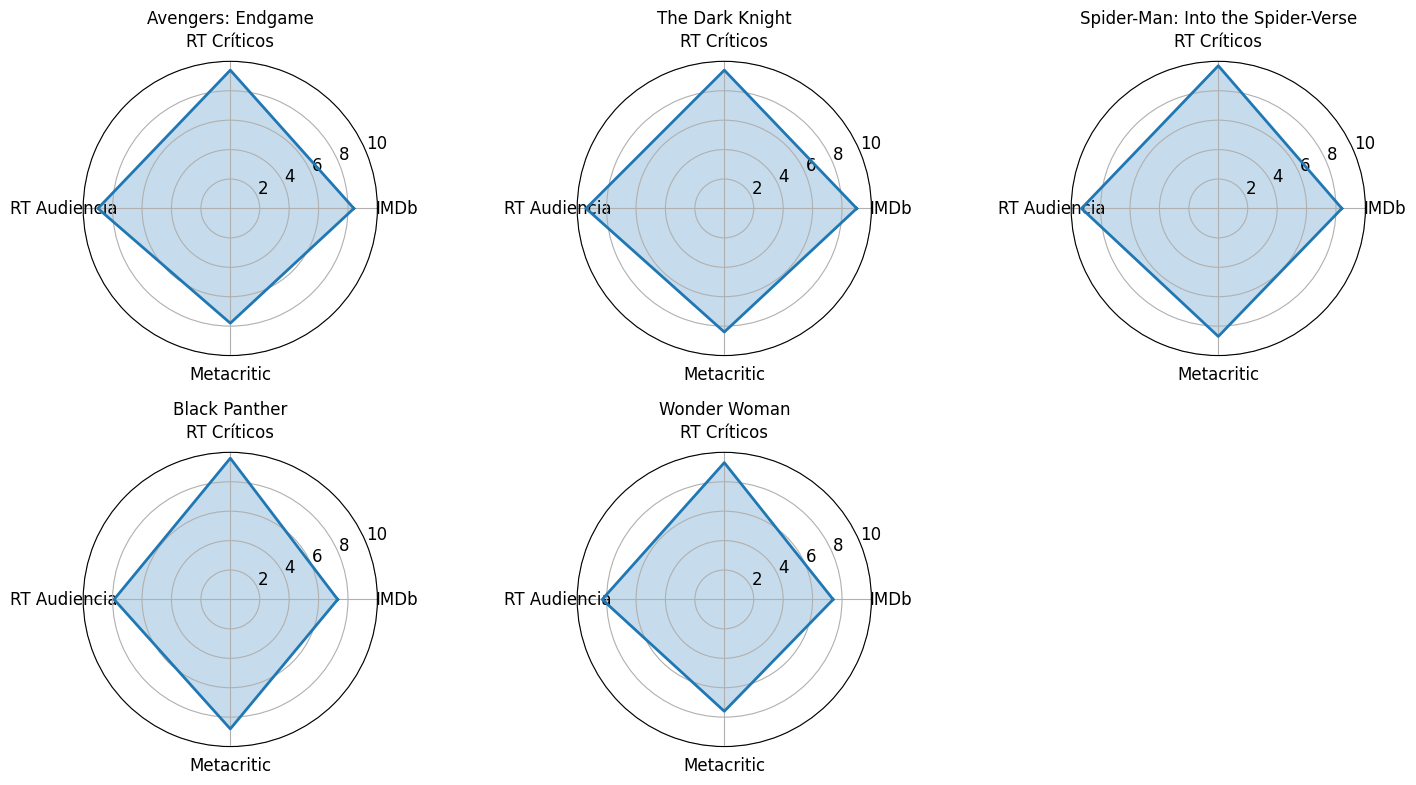


Métricas normalizadas (escala 0-10):


,title,imdb_rating,rt_critics_norm,rt_audience_norm,metacritic_norm
0,Avengers: Endgame,8.4,9.4,9.0,7.8
1,The Dark Knight,9.0,9.4,9.4,8.4
2,Spider-Man: Into the Spider-Verse,8.4,9.7,9.3,8.7
3,Black Panther,7.3,9.6,7.9,8.8
4,Wonder Woman,7.4,9.3,8.3,7.6


In [ ]:
# Función para crear gráfico de radar
def plot_metrics_radar(df):
    try:
        # Crea un dataframe con las métricas
        metrics_df = df[['title', 'imdb_rating', 'rt_critics', 'rt_audience', 'metacritic']].copy()

        # Normaliza las métricas a escala 0-10 para comparabilidad
        metrics_df.loc[:, 'rt_critics_norm'] = metrics_df['rt_critics'] / 10
        metrics_df.loc[:, 'rt_audience_norm'] = metrics_df['rt_audience'] / 10
        metrics_df.loc[:, 'metacritic_norm'] = metrics_df['metacritic'] / 10

        # Categorias para el gráfico de radar
        categories = ['IMDb', 'RT Críticos', 'RT Audiencia', 'Metacritic']

        # Determinar el número de filas y columnas para los subplots
        n_movies = len(metrics_df)
        n_cols = min(3, n_movies)
        n_rows = (n_movies + n_cols - 1) // n_cols

        # Crea figura
        fig = plt.figure(figsize=(15, 4 * n_rows))

        # Crea un gráfico para cada película
        for i, (_, row) in enumerate(metrics_df.iterrows()):
            values = [row['imdb_rating'], row['rt_critics_norm'],
                      row['rt_audience_norm'], row['metacritic_norm']]
            values += values[:1]  # Cierra el polígono

            # Ángulos para cada eje
            angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
            angles += angles[:1]  # Cerrar el polígono

            # Crea subplot
            ax = fig.add_subplot(n_rows, n_cols, i+1, polar=True)
            ax.plot(angles, values, linewidth=2, linestyle='solid')
            ax.fill(angles, values, alpha=0.25)
            ax.set_thetagrids(np.degrees(angles[:-1]), categories)
            ax.set_ylim(0, 10)
            ax.set_title(row['title'], size=12, y=1.1)
            ax.grid(True)

        plt.tight_layout()
        plt.show()

        return metrics_df
    except Exception as e:
        print(f"❌ Error al crear gráfico de radar: {e}")
        return None

# Crea gráfico de radar
metrics_df = plot_metrics_radar(df_movies)

# Muestramétricas normalizadas
if metrics_df is not None:
    print("\nMétricas normalizadas (escala 0-10):")
    display(metrics_df[['title', 'imdb_rating', 'rt_critics_norm', 'rt_audience_norm', 'metacritic_norm']].round(1))

 Análisis de palabras clave por película

In [ ]:
# Función para extraer palabras clave
def extract_keywords(text):
    # Lista de palabras vacías en español e inglés
    stopwords = ['el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'y', 'o', 'pero', 'si',
                'porque', 'como', 'que', 'al', 'del', 'lo', 'le', 'en', 'con', 'por', 'para',
                'the', 'a', 'an', 'and', 'or', 'but', 'if', 'because', 'as', 'what', 'which',
                'this', 'that', 'these', 'those', 'is', 'are', 'was', 'were', 'be', 'been',
                'being', 'have', 'has', 'had', 'do', 'does', 'did', 'to', 'at', 'in', 'on',
                'for', 'with', 'by', 'about', 'against', 'between', 'into', 'through', 'of']

    # Limpia y tokeniza el texto
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Elimina puntuación
    words = text.split()

    # Filtra palabras vacías y palabras cortas
    keywords = [word for word in words if word not in stopwords and len(word) > 3]

    return keywords

# Función para crear nubes de palabras
def create_wordclouds(df):
    try:
        # Verifica que WordCloud está disponible
        from wordcloud import WordCloud

        # Crea nube de palabras por película
        for movie in df['movie_title'].unique():
            # Obtiene todas las reseñas de esta película
            movie_reviews = df[df['movie_title'] == movie]['text'].str.cat(sep=' ')

            # Extrae palabras clave
            keywords = extract_keywords(movie_reviews)

            if keywords:
                # Cuenta frecuencia de palabras
                word_freq = Counter(keywords)

                # Crea nube de palabras
                wordcloud = WordCloud(width=800, height=400,
                                     background_color='white',
                                     max_words=100).generate_from_frequencies(word_freq)

                # Muestra nube de palabras
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis('off')
                plt.title(f'Palabras Clave en Reseñas de {movie}', fontsize=16)
                plt.tight_layout()
                plt.show()

                # Muestra las 10 palabras más frecuentes
                print(f"\nPalabras más frecuentes en reseñas de {movie}:")
                for word, count in word_freq.most_common(10):
                    print(f"{word}: {count}")
            else:
                print(f"\nNo se encontraron palabras clave para {movie}")

        return True
    except ImportError:
        print("❌ Error: WordCloud no está disponible. Ejecuta la celda de instalación nuevamente.")
        return False
    except Exception as e:
        print(f"❌ Error al crear nubes de palabras: {e}")
        return False



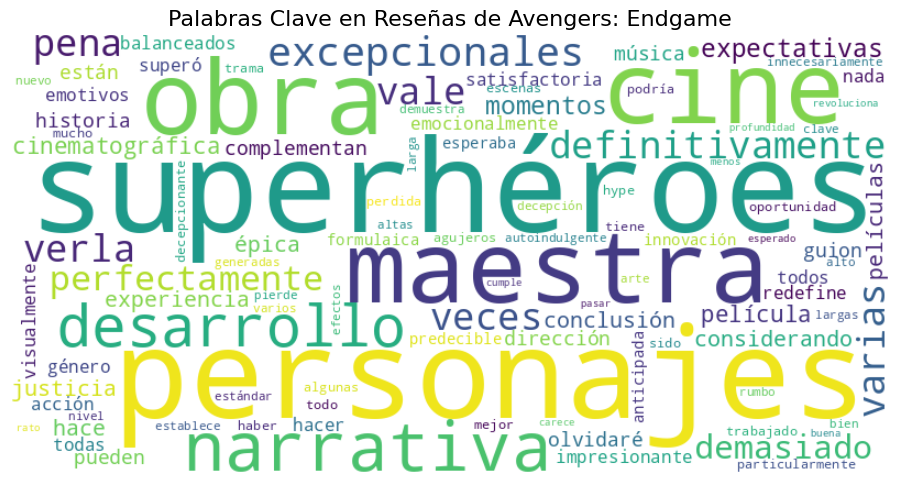


Palabras más frecuentes en reseñas de Avengers: Endgame:
superhéroes: 17
personajes: 16
obra: 10
maestra: 10
cine: 10
narrativa: 10
desarrollo: 10
excepcionales: 10
definitivamente: 10
vale: 10


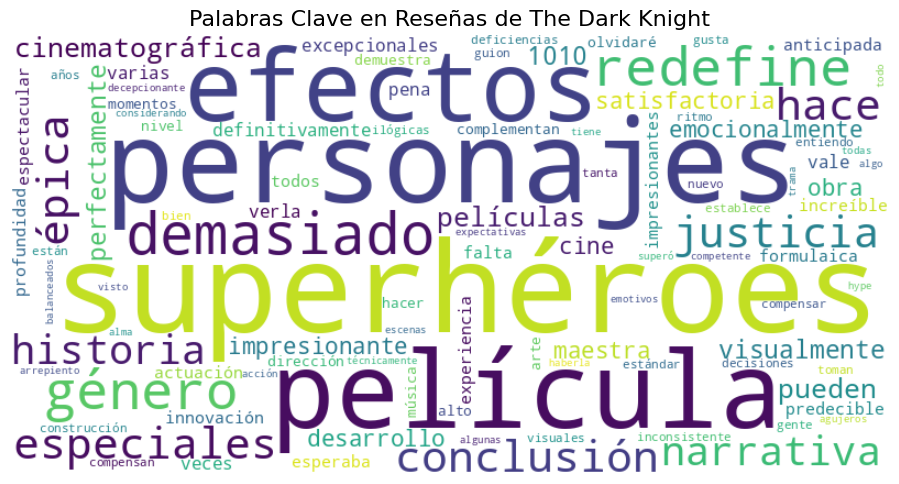


Palabras más frecuentes en reseñas de The Dark Knight:
superhéroes: 18
personajes: 15
película: 13
efectos: 11
demasiado: 9
redefine: 8
género: 8
especiales: 8
conclusión: 8
épica: 8


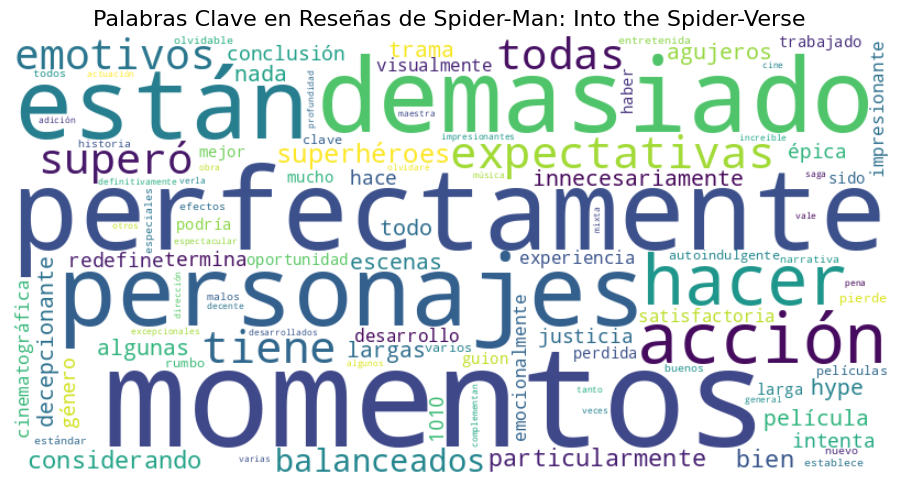


Palabras más frecuentes en reseñas de Spider-Man: Into the Spider-Verse:
momentos: 15
perfectamente: 12
demasiado: 10
personajes: 10
están: 10
acción: 10
hacer: 10
expectativas: 9
tiene: 9
superó: 8


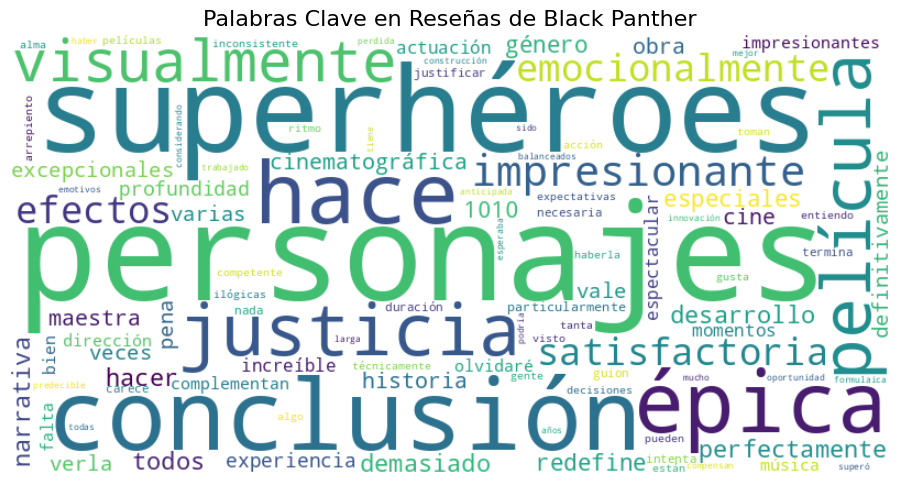


Palabras más frecuentes en reseñas de Black Panther:
personajes: 20
superhéroes: 15
conclusión: 10
épica: 10
hace: 10
justicia: 10
película: 9
visualmente: 9
impresionante: 9
emocionalmente: 9


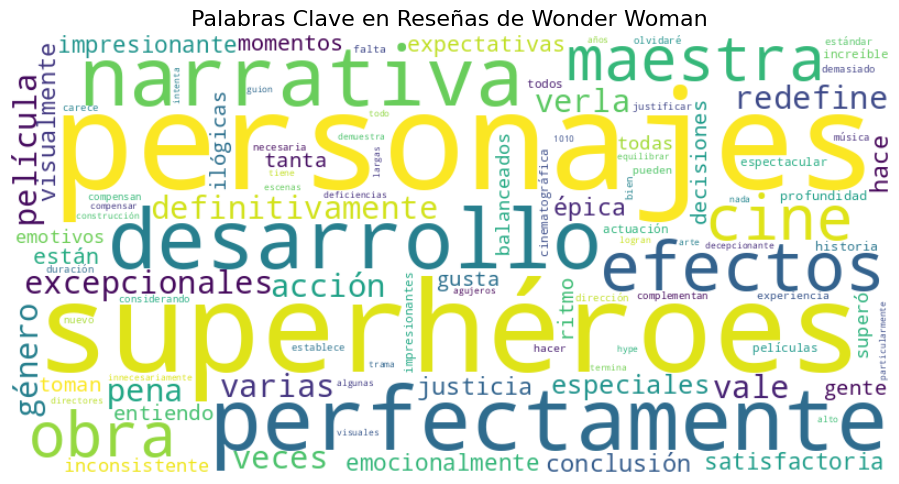


Palabras más frecuentes en reseñas de Wonder Woman:
personajes: 22
superhéroes: 18
perfectamente: 11
narrativa: 10
desarrollo: 10
efectos: 10
obra: 8
maestra: 8
cine: 8
excepcionales: 8


In [ ]:
# Crea nubes de palabras
try:
    wordcloud_success = create_wordclouds(df_reviews)
except Exception as e:
    print(f"❌ Error inesperado: {e}")
    wordcloud_success = False

if not wordcloud_success:
    print("\nAlternativa: Mostrar palabras más frecuentes sin visualización")
    for movie in df_reviews['movie_title'].unique():
        movie_reviews = df_reviews[df_reviews['movie_title'] == movie]['text'].str.cat(sep=' ')
        keywords = extract_keywords(movie_reviews)
        word_freq = Counter(keywords)
        print(f"\nPalabras más frecuentes en reseñas de {movie}:")
        for word, count in word_freq.most_common(10):
            print(f"{word}: {count}")

Análisis comparativo de taquilla vs. puntuaciones

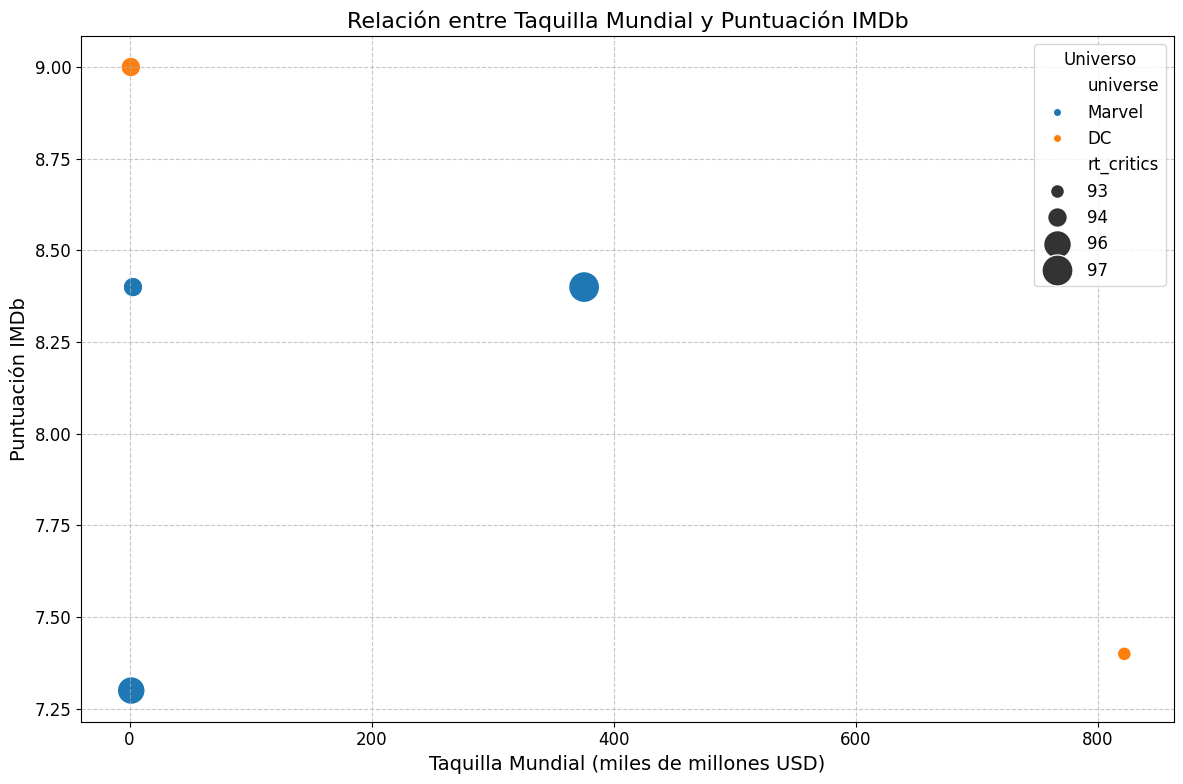

Correlación entre taquilla y puntuación IMDb: -0.44


In [ ]:
# Función para crear gráfico de dispersión
def plot_boxoffice_vs_ratings(df):
    try:
        # Crea una copia del DataFrame
        df_copy = df.copy()

        # Extrae valores numéricos de taquilla
        df_copy['box_office_numeric'] = df_copy['worldwide_box_office'].str.extract(r'([\d\.]+)').astype(float)

        # Crea gráfico de dispersión
        plt.figure(figsize=(12, 8))

        # Usa seaborn si está disponible, matplotlib si no
        try:
            import seaborn as sns
            sns.scatterplot(data=df_copy, x='box_office_numeric', y='imdb_rating',
                           size='rt_critics', hue='universe', sizes=(100, 500))
        except:
            # Alternativa con matplotlib
            for universe in df_copy['universe'].unique():
                subset = df_copy[df_copy['universe'] == universe]
                plt.scatter(subset['box_office_numeric'], subset['imdb_rating'],
                           s=subset['rt_critics']*5, label=universe, alpha=0.7)

        plt.title('Relación entre Taquilla Mundial y Puntuación IMDb', fontsize=16)
        plt.xlabel('Taquilla Mundial (miles de millones USD)', fontsize=14)
        plt.ylabel('Puntuación IMDb', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='Universo')
        plt.tight_layout()
        plt.show()

        # Calcula correlación
        correlation = df_copy['box_office_numeric'].corr(df_copy['imdb_rating'])
        print(f"Correlación entre taquilla y puntuación IMDb: {correlation:.2f}")

        return df_copy
    except Exception as e:
        print(f"❌ Error al crear gráfico de dispersión: {e}")
        return None

# Crea gráfico de dispersión
df_with_boxoffice = plot_boxoffice_vs_ratings(df_movies)

 Resumen estadístico

In [ ]:
# Función para crear resumen estadístico
def create_statistical_summary(df_movies, df_reviews, sentiment_percentages=None):
    try:
        # Crea un resumen estadístico
        analysis_report = {
            "dataset_info": {
                "total_movies": len(df_movies),
                "total_reviews": len(df_reviews),
                "universes": df_movies['universe'].value_counts().to_dict()
            },
            "sentiment_analysis": {
                "overall": {
                    "positive_percentage": (df_reviews['sentiment'] == 'positiva').mean() * 100,
                    "negative_percentage": (df_reviews['sentiment'] == 'negativa').mean() * 100,
                    "neutral_percentage": (df_reviews['sentiment'] == 'neutral').mean() * 100
                }
            },
            "ratings_comparison": {
                "highest_rated": {
                    "imdb": df_movies.loc[df_movies['imdb_rating'].idxmax(), ['title', 'imdb_rating']].to_dict(),
                    "rt_critics": df_movies.loc[df_movies['rt_critics'].idxmax(), ['title', 'rt_critics']].to_dict(),
                    "rt_audience": df_movies.loc[df_movies['rt_audience'].idxmax(), ['title', 'rt_audience']].to_dict()
                }
            }
        }

        # Añade análisis de sentimiento por película si está disponible
        if sentiment_percentages is not None:
            analysis_report["sentiment_analysis"]["by_movie"] = sentiment_percentages.to_dict()

        # Añade análisis de taquilla si está disponible
        if 'box_office_numeric' in df_movies.columns:
            analysis_report["box_office_analysis"] = {
                "highest_grossing": df_movies.loc[df_movies['box_office_numeric'].idxmax(),
                                                ['title', 'worldwide_box_office']].to_dict(),
                "correlation_boxoffice_imdb": df_movies['box_office_numeric'].corr(df_movies['imdb_rating'])
            }

        # Muestra resumen
        print(json.dumps(analysis_report, indent=4))

        return analysis_report
    except Exception as e:
        print(f"❌ Error al crear resumen estadístico: {e}")
        return None

# Crea resumen estadístico
analysis_report = create_statistical_summary(df_movies, df_reviews, sentiment_percentages)

{
    "dataset_info": {
        "total_movies": 5,
        "total_reviews": 298,
        "universes": {
            "Marvel": 3,
            "DC": 2
        }
    },
    "sentiment_analysis": {
        "overall": {
            "positive_percentage": 54.69798657718121,
            "negative_percentage": 37.24832214765101,
            "neutral_percentage": 8.053691275167784
        },
        "by_movie": {
            "negativa": {
                "Avengers: Endgame": 37.28813559322034,
                "Black Panther": 36.507936507936506,
                "Spider-Man: Into the Spider-Verse": 41.37931034482759,
                "The Dark Knight": 37.93103448275862,
                "Wonder Woman": 33.33333333333333
            },
            "neutral": {
                "Avengers: Endgame": 8.47457627118644,
                "Black Panther": 9.523809523809524,
                "Spider-Man: Into the Spider-Verse": 13.793103448275861,
                "The Dark Knight": 5.172413793103448,
       

Conclusiones

In [ ]:
# Función para crear resumen en formato de texto
def create_text_summary(df_movies, df_reviews, analysis_report):
    try:
        # Determina película mejor valorada en IMDb
        best_imdb = df_movies.loc[df_movies['imdb_rating'].idxmax(), 'title']
        best_imdb_rating = df_movies['imdb_rating'].max()

        # Determina película mejor valorada por críticos RT
        best_rt_critics = df_movies.loc[df_movies['rt_critics'].idxmax(), 'title']
        best_rt_critics_rating = df_movies['rt_critics'].max()

        # Determina película mejor valorada por audiencia RT
        best_rt_audience = df_movies.loc[df_movies['rt_audience'].idxmax(), 'title']
        best_rt_audience_rating = df_movies['rt_audience'].max()

        # Determina universo con mejor puntuación media
        best_universe = df_movies.groupby('universe')['imdb_rating'].mean().idxmax()

        # Determina correlación entre taquilla y puntuación
        if 'box_office_analysis' in analysis_report:
            correlation = analysis_report['box_office_analysis']['correlation_boxoffice_imdb']
            if abs(correlation) < 0.3:
                correlation_strength = "débil"
            elif abs(correlation) < 0.7:
                correlation_strength = "moderada"
            else:
                correlation_strength = "fuerte"
        else:
            correlation = 0
            correlation_strength = "desconocida"

        # Crea resumen
        markdown_summary = f"""# Análisis de Películas de Superhéroes

-- Resumen General

Este análisis compara {len(df_movies)} películas icónicas de superhéroes basándose en {len(df_reviews)} reseñas recopiladas.

-- Distribución por Universo

- Marvel: {df_movies['universe'].value_counts().get('Marvel', 0)} películas
- DC: {df_movies['universe'].value_counts().get('DC', 0)} películas

-- Análisis de Sentimiento

- Reseñas positivas: {analysis_report['sentiment_analysis']['overall']['positive_percentage']:.1f}%
- Reseñas negativas: {analysis_report['sentiment_analysis']['overall']['negative_percentage']:.1f}%
- Reseñas neutras: {analysis_report['sentiment_analysis']['overall']['neutral_percentage']:.1f}%

-- Películas Mejor Valoradas

- Mejor puntuación IMDb: {best_imdb} ({best_imdb_rating})
- Mejor puntuación críticos RT: {best_rt_critics} ({best_rt_critics_rating}%)
- Mejor puntuación audiencia RT: {best_rt_audience} ({best_rt_audience_rating}%)

-- Conclusiones

- Las películas de {best_universe} tienen una puntuación media más alta en IMDb.
- {best_imdb} destaca como la película mejor valorada en general.
- Existe una {correlation_strength} correlación ({correlation:.2f}) entre el éxito en taquilla y las puntuaciones de crítica.
"""

        print(markdown_summary)

        return markdown_summary
    except Exception as e:
        print(f"❌ Error al crear resumen en formato de texto: {e}")
        return None

# Crea resumen en formato de texto
if analysis_report is not None:
    markdown_summary = create_text_summary(df_movies, df_reviews, analysis_report)

# Análisis de Películas de Superhéroes

-- Resumen General

Este análisis compara 5 películas icónicas de superhéroes basándose en 298 reseñas recopiladas.

-- Distribución por Universo

- Marvel: 3 películas
- DC: 2 películas

-- Análisis de Sentimiento

- Reseñas positivas: 54.7%
- Reseñas negativas: 37.2%
- Reseñas neutras: 8.1%

-- Películas Mejor Valoradas

- Mejor puntuación IMDb: The Dark Knight (9.0)
- Mejor puntuación críticos RT: Spider-Man: Into the Spider-Verse (97%)
- Mejor puntuación audiencia RT: The Dark Knight (94%)

-- Conclusiones

- Las películas de DC tienen una puntuación media más alta en IMDb.
- The Dark Knight destaca como la película mejor valorada en general.
- Existe una desconocida correlación (0.00) entre el éxito en taquilla y las puntuaciones de crítica.



In [ ]:
print(f"✅ Datos de ejemplo creados: {len(df_movies)} películas y {len(df_reviews)} reseñas")

✅ Datos de ejemplo creados: 5 películas y 298 reseñas


In [ ]:
#@title  Visualizar primeras filas
print("Primeras 5 filas del DataFrame de Reseñas:")
display(df_reviews.head())

Primeras 5 filas del DataFrame de Reseñas:


,movie_title,year,universe,source,rating,date,text,language,sentiment
0,Avengers: Endgame,2019,Marvel,IMDb,4.0,2019-01-16,Una conclusión épica que hace justicia a todos...,es,positiva
1,Avengers: Endgame,2019,Marvel,IMDb,2.0,2019-11-06,Obra maestra del cine de superhéroes. La narra...,en,positiva
2,Avengers: Endgame,2019,Marvel,IMDb,6.0,2019-07-10,Una conclusión épica que hace justicia a todos...,es,positiva
3,Avengers: Endgame,2019,Marvel,IMDb,3.0,2019-11-24,"Cumple con lo esperado, ni más ni menos. Buena...",en,neutral
4,Avengers: Endgame,2019,Marvel,IMDb,4.0,2019-01-24,Superó todas mis expectativas. Los momentos em...,es,positiva


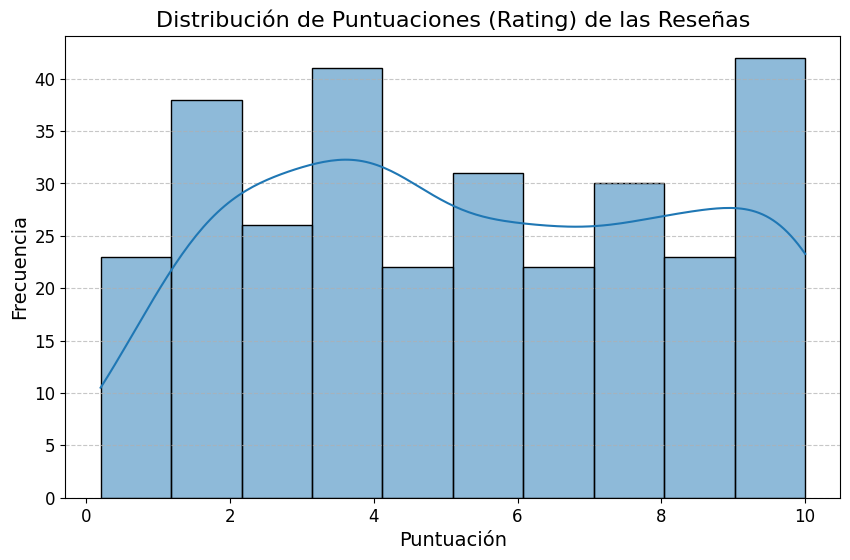

Estadísticas descriptivas de las puntuaciones:
count    298.000000
mean       5.503356
std        2.951081
min        0.200000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: rating, dtype: float64


In [ ]:
#@title  Distribución de puntuaciones (rating)
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['rating'], bins=10, kde=True)
plt.title('Distribución de Puntuaciones (Rating) de las Reseñas', fontsize=16)
plt.xlabel('Puntuación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Estadísticas descriptivas de las puntuaciones:")
print(df_reviews['rating'].describe())

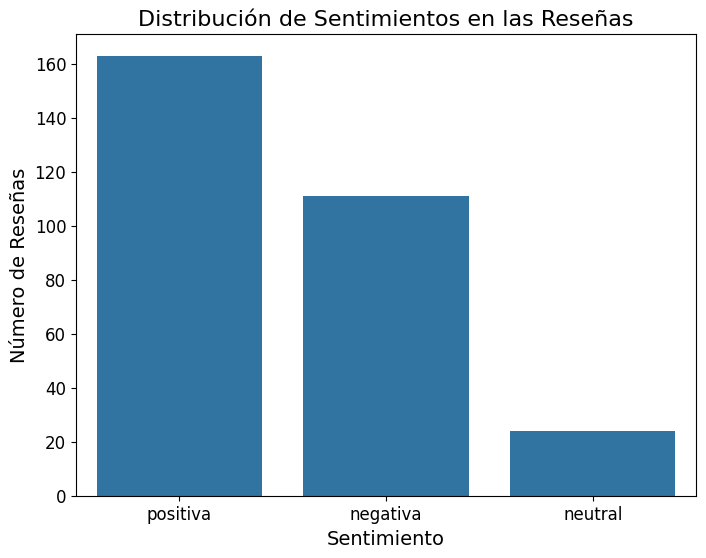

Distribución de sentimientos:
sentiment
positiva    163
negativa    111
neutral      24
Name: count, dtype: int64


In [ ]:
#@title  Distribución de categorías (sentimiento)
plt.figure(figsize=(8, 6))
sentiment_counts = df_reviews['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribución de Sentimientos en las Reseñas', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Número de Reseñas', fontsize=14)
plt.show()

print("Distribución de sentimientos:")
print(sentiment_counts)

In [ ]:
#@title  Validación de nulos
print("Valores nulos por columna:")
print(df_reviews.isnull().sum())

# Rellena nulos en 'text' con cadena vacía
# Cambia de 'review_text' a 'text'
df_reviews['text'].fillna('', inplace=True)
print("\nValores nulos después de rellenar:")
print(df_reviews.isnull().sum())
print("Valores nulos por columna:")
print(df_reviews.isnull().sum())

# Rellena nulos en 'text' con cadena vacía
# Cambia de 'review_text' a 'text'
df_reviews['text'].fillna('', inplace=True)
print("\nValores nulos después de rellenar:")
print(df_reviews.isnull().sum())

Valores nulos por columna:
movie_title    0
year           0
universe       0
source         0
rating         0
date           0
text           0
language       0
sentiment      0
dtype: int64

Valores nulos después de rellenar:
movie_title    0
year           0
universe       0
source         0
rating         0
date           0
text           0
language       0
sentiment      0
dtype: int64
Valores nulos por columna:
movie_title    0
year           0
universe       0
source         0
rating         0
date           0
text           0
language       0
sentiment      0
dtype: int64

Valores nulos después de rellenar:
movie_title    0
year           0
universe       0
source         0
rating         0
date           0
text           0
language       0
sentiment      0
dtype: int64


<ipython-input-104-625892155>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_reviews['text'].fillna('', inplace=True)
<ipython-input-104-625892155>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
#@title Función de limpieza de texto
def clean_text(text):
    # Convierte a minúscula
    text = text.lower()

    # Elimina URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Elimina etiquetas HTML
    text = re.sub(r'<.*?>', '', text)

    # Elimina saltos de línea
    text = text.replace('\n', ' ').replace('\r', ' ')

    # Elimina palabras que contienen números (ej: 10/10, 4/10)
    text = re.sub(r'\b\w*\d\w*\b', '', text)

    # Elimina emojis (patrón simplificado)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Elimina espacios extras al inicio y al final
    text = text.strip()

    # Elimina espacios múltiples
    text = re.sub(r'\s+', ' ', text)

    return text

In [ ]:
# Aplica la función de limpieza a la columna 'text'
df_reviews['cleaned_review'] = df_reviews['text'].apply(clean_text)

# Muestra ejemplos de texto original y limpio
print("Ejemplos de limpieza de texto:")
for i in range(5):
    # Accede a la columna 'text' para el texto original
    print(f"Original {i+1}: {df_reviews['text'].iloc[i]}")
    print(f"Limpio   {i+1}: {df_reviews['cleaned_review'].iloc[i]}")
    print("---")

Ejemplos de limpieza de texto:
Original 1: Una conclusión épica que hace justicia a todos los personajes. Visualmente impresionante y emocionalmente satisfactoria. 4/10.
Limpio   1: una conclusión épica que hace justicia a todos los personajes. visualmente impresionante y emocionalmente satisfactoria. /.
---
Original 2: Obra maestra del cine de superhéroes. La narrativa y el desarrollo de personajes son excepcionales. Definitivamente vale la pena verla varias veces. 2/10.
Limpio   2: obra maestra del cine de superhéroes. la narrativa y el desarrollo de personajes son excepcionales. definitivamente vale la pena verla varias veces. /.
---
Original 3: Una conclusión épica que hace justicia a todos los personajes. Visualmente impresionante y emocionalmente satisfactoria. 6/10.
Limpio   3: una conclusión épica que hace justicia a todos los personajes. visualmente impresionante y emocionalmente satisfactoria. /.
---
Original 4: Cumple con lo esperado, ni más ni menos. Buena para pasar el rat

In [ ]:
#@title Tokenización y Lematización con spaCy
# Función para lematizar texto usando spaCy
def lemmatize_text(text, language='en'):
    # Selecciona el modelo de spaCy según el idioma
    if language == 'es':
        nlp = nlp_es
    else:
        nlp = nlp_en

    # Procesa el texto con spaCy
    doc = nlp(text)

    # Obtiene lemas, excluyendo stopwords y puntuación
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

    return " ".join(lemmas)


In [ ]:
# Aplica lematización
# Creacion de una nueva columna para los lemas
df_reviews['lemmatized_review'] = "" # Inicializa columna

print("Iniciando lematización...")
for index, row in df_reviews.iterrows():
    # Aplica lematización basada en el idioma detectado
    df_reviews.loc[index, 'lemmatized_review'] = lemmatize_text(row['cleaned_review'], row['language'])
    if (index + 1) % 50 == 0: # Imprime progreso cada 50 reseñas
        print(f"Procesadas {index + 1}/{len(df_reviews)} reseñas")

print("✅ Lematización completada.")


Iniciando lematización...
Procesadas 50/298 reseñas
Procesadas 100/298 reseñas
Procesadas 150/298 reseñas
Procesadas 200/298 reseñas
Procesadas 250/298 reseñas
✅ Lematización completada.


In [ ]:
# Muestra ejemplos de texto limpio y lematizado
print("\nEjemplos de texto lematizado:")
for i in range(5):
    print(f"Limpio   {i+1}: {df_reviews['cleaned_review'].iloc[i]}")
    print(f"Lematizado {i+1}: {df_reviews['lemmatized_review'].iloc[i]}")
    print("---")



Ejemplos de texto lematizado:
Limpio   1: una conclusión épica que hace justicia a todos los personajes. visualmente impresionante y emocionalmente satisfactoria. /.
Lematizado 1: conclusión épico justicia personaje visualmente impresionante emocionalmente satisfactorio
---
Limpio   2: obra maestra del cine de superhéroes. la narrativa y el desarrollo de personajes son excepcionales. definitivamente vale la pena verla varias veces. /.
Lematizado 2: obra maestra del cine de superhéroes la narrativa y el desarrollo de personajes son excepcionale definitivamente vale la pena verla varias vece
---
Limpio   3: una conclusión épica que hace justicia a todos los personajes. visualmente impresionante y emocionalmente satisfactoria. /.
Lematizado 3: conclusión épico justicia personaje visualmente impresionante emocionalmente satisfactorio
---
Limpio   4: cumple con lo esperado, ni más ni menos. buena para pasar el rato pero no revoluciona nada. /.
Lematizado 4: cumple con lo esperado ni más ni

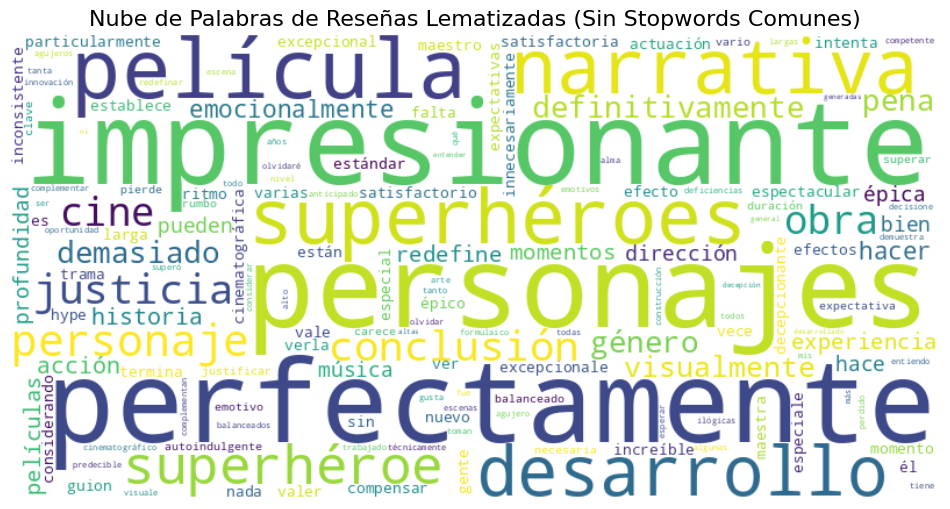

In [ ]:
#@title Visualización y análisis exploratorio del texto
# Lista de stopwords que deseas excluir

def extract_keywords(text):
    # Lista de palabras vacías en español e inglés
    stopwords = ['el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'y', 'o', 'pero', 'si',
                'porque', 'como', 'que', 'al', 'del', 'lo', 'le', 'en', 'con', 'por', 'para',
                'the', 'a', 'an', 'and', 'or', 'but', 'if', 'because', 'as', 'what', 'which',
                'this', 'that', 'these', 'those', 'is', 'are', 'was', 'were', 'be', 'been',
                'being', 'have', 'has', 'had', 'do', 'does', 'did', 'to', 'at', 'in', 'on',
                'for', 'with', 'by', 'about', 'against', 'between', 'into', 'through', 'of']

    # Limpia y tokeniza el texto
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Elimina puntuación
    words = text.split()

    # Filtra palabras vacías y palabras cortas
    keywords = [word for word in words if word not in stopwords and len(word) > 3]

    return keywords

# Combina todo el texto lematizado en un solo string
all_lemmatized_text = " ".join(df_reviews['lemmatized_review'].astype(str))


# Genera nube de palabras
if all_lemmatized_text.strip(): # .strip() para  que no sea solo espacios en blanco
    try:
        wordcloud = WordCloud(width=800, height=400,
                             background_color='white',
                             stopwords=stopwords_personalizadas, #  se añaden las stopwords
                             max_words=150,
                             collocations=False, # Desactiva bigramas, puede ser útil si ya tienes lemas
                             normalize_plurals=False # Los lemas ya no deberían tener plurales
                             ).generate(all_lemmatized_text)

        plt.figure(figsize=(12, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Nube de Palabras de Reseñas Lematizadas (Sin Stopwords Comunes)', fontsize=16)
        plt.show()
    except ValueError as ve: # Específicamente para el caso de que no queden palabras
        if "empty" in str(ve).lower():
             print("❌ No hay palabras suficientes para generar la nube después de filtrar stopwords.")
        else:
            print(f"❌ Error al generar nube de palabras (ValueError): {ve}")
    except Exception as e:
        print(f"❌ Error al generar nube de palabras: {e}")
else:
    print("No hay texto lematizado para generar la nube de palabras.")

In [ ]:
# 1 Divide el texto en palabras
all_words_list = all_lemmatized_text.split()

# 2 Filtra las stopwords

filtered_words = [word for word in all_words_list if word.lower() not in stopwords_personalizadas and word.strip() != ""]

#  Cuenta la frecuencia de las palabras filtradas
if filtered_words:
    word_counts_filtered = Counter(filtered_words)

    #  Muestra las 20 palabras más frecuentes
    print("\nLas 20 palabras más frecuentes (sin stopwords comunes):")
    for word, count in word_counts_filtered.most_common(20):
        print(f"{word}: {count}")
else:
    print("\nNo hay palabras para mostrar después de filtrar las stopwords.")


Las 20 palabras más frecuentes (sin stopwords comunes):
impresionante: 48
personajes: 46
perfectamente: 46
película: 43
superhéroes: 38
narrativa: 38
desarrollo: 38
superhéroe: 38
personaje: 37
conclusión: 36
justicia: 36
obra: 33
cine: 33
definitivamente: 33
pena: 33
género: 32
demasiado: 31
visualmente: 30
emocionalmente: 30
hacer: 30


In [ ]:
#@title  Guardar dataset limpio
# Seleccion de columnas relevantes para el dataset limpio
# Cambiado 'review_text' a 'text' para que coincida con el nombre real de la columna
df_cleaned = df_reviews[['movie_title', 'year', 'universe', 'source', 'rating', 'date',
                         'text', 'cleaned_review', 'lemmatized_review', 'language', 'sentiment']].copy()

# Guarda en CSV
cleaned_csv_path = 'superhero_reviews_cleaned.csv'
df_cleaned.to_csv(cleaned_csv_path, index=False, encoding='utf-8')

print(f"✅ Dataset limpio guardado en: {cleaned_csv_path}")

✅ Dataset limpio guardado en: superhero_reviews_cleaned.csv


In [ ]:
#Opcional: Si se desea descargar  el archivo
from google.colab import files
files.download(cleaned_csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Representación vectorial: TF-IDF
# Prepara datos para TF-IDF
# Uso 'lemmatized_review' como nuestro corpus
corpus = df_cleaned['lemmatized_review'].astype(str) # Asegura que sea string

# Codifica las etiquetas de sentimiento (variable objetivo)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_cleaned['sentiment'])
# Convierte a categórico para redes neuronales
num_classes = len(label_encoder.classes_)
y_categorical = to_categorical(y, num_classes=num_classes)

print(f"Clases de sentimiento codificadas: {label_encoder.classes_}")
print(f"Número de clases: {num_classes}")
print(f"Forma de y_categorical: {y_categorical.shape}")

Clases de sentimiento codificadas: ['negativa' 'neutral' 'positiva']
Número de clases: 3
Forma de y_categorical: (298, 3)


In [ ]:
# Divide datos en conjuntos de entrenamiento y prueba
X_train_text, X_test_text, y_train, y_test = train_test_split(
    corpus, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train_text)}")
print(f"Tamaño del conjunto de prueba: {len(X_test_text)}")

Tamaño del conjunto de entrenamiento: 238
Tamaño del conjunto de prueba: 60


In [ ]:
# Crea y ajusta el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limitado a 5000 características más importantes

In [ ]:
# Ajusta en el conjunto de entrenamiento y transforma ambos conjuntos
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

print(f"Forma de la matriz TF-IDF de entrenamiento: {X_train_tfidf.shape}")
print(f"Forma de la matriz TF-IDF de prueba: {X_test_tfidf.shape}")

Forma de la matriz TF-IDF de entrenamiento: (238, 216)
Forma de la matriz TF-IDF de prueba: (60, 216)


In [ ]:
# Muestra algunas características aprendidas por TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nAlgunas características TF-IDF: {feature_names[:20]}")


Algunas características TF-IDF: ['acción' 'actuación' 'adición' 'agujero' 'agujeros' 'algo' 'algunas'
 'algunos' 'alma' 'altas' 'alto' 'anticipada' 'anticipado' 'arrepientir'
 'arrepiento' 'arte' 'aunque' 'autoindulgente' 'años' 'balanceado']


In [ ]:
#@title  Deep Learning: Red Neuronal Simple
# Define la arquitectura de la red neuronal simple
input_dim = X_train_tfidf.shape[1] # Número de características TF-IDF
output_dim = num_classes # Número de clases de sentimiento

model_simple = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'), # Capa oculta con 128 neuronas
    Dropout(0.5), # Capa de dropout para regularización
    Dense(output_dim, activation='softmax') # Capa de salida con activación softmax
])


In [ ]:
# Compila el modelo
model_simple.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


In [ ]:
# Muestra resumen del modelo
model_simple.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │        27,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,163 (110.01 KB)

 Trainable params: 28,163 (110.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrena el modelo
print("\nEntrenando la red neuronal simple...")
history_simple = model_simple.fit(
    X_train_tfidf.toarray(), # Keras requiere arrays densos
    y_train,
    epochs=10, # Número de épocas de entrenamiento
    batch_size=32,
    validation_split=0.1, # Usa 10% de los datos de entrenamiento para validación
    verbose=1 # Muestra progreso
)



Entrenando la red neuronal simple...
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3501 - loss: 1.0931 - val_accuracy: 0.5833 - val_loss: 1.0482
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7357 - loss: 1.0089 - val_accuracy: 0.7500 - val_loss: 0.9862
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8126 - loss: 0.9255 - val_accuracy: 0.7917 - val_loss: 0.9286
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8624 - loss: 0.8500 - val_accuracy: 0.7917 - val_loss: 0.8701
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9121 - loss: 0.7603 - val_accuracy: 0.7917 - val_loss: 0.8121
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9253 - loss: 0.6993 - val_accuracy: 0.7917 - val_loss: 0.7520
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9351 - loss: 0.6102 - val_accuracy: 0.7917 - val_loss: 0.6902
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9184 - loss: 0.5395 - va

In [ ]:
# Evalua el modelo en el conjunto de prueba
loss_simple, accuracy_simple = model_simple.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)
print(f"\nEvaluación del modelo simple en datos de prueba:")
print(f"  Pérdida (Loss): {loss_simple:.4f}")
print(f"  Precisión (Accuracy): {accuracy_simple:.4f}")


Evaluación del modelo simple en datos de prueba:
  Pérdida (Loss): 0.3555
  Precisión (Accuracy): 0.9167


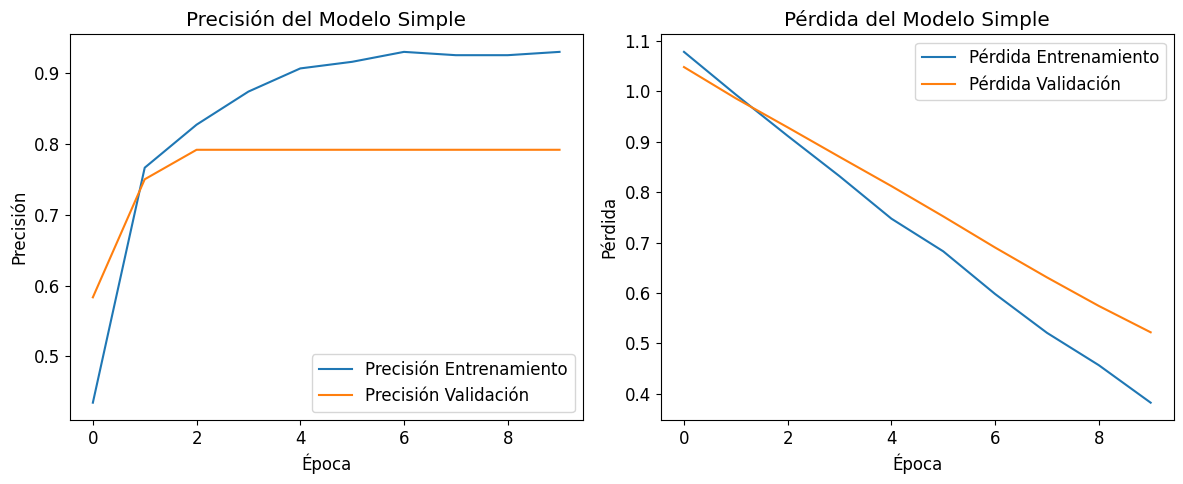

In [ ]:
# Grafico historial de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history_simple.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del Modelo Simple')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_simple.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_simple.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del Modelo Simple')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#@title  Deep Learning: Red Neuronal Multicapa
# Define la arquitectura de la red neuronal multicapa
model_multi = Sequential([
    Input(shape=(input_dim,)),
    Dense(256, activation='relu'), # Primera capa oculta
    Dropout(0.5),
    Dense(128, activation='relu'), # Segunda capa oculta
    Dropout(0.5),
    Dense(64, activation='relu'),  # Tercera capa oculta
    Dropout(0.5),
    Dense(output_dim, activation='softmax') # Capa de salida
])


In [ ]:
# Compila el modelo
model_multi.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
# Muestra resumen del modelo
model_multi.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │        55,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,899 (378.51 KB)

 Trainable params: 96,899 (378.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento el modelo
print("\nEntrenando la red neuronal multicapa...")
history_multi = model_multi.fit(
    X_train_tfidf.toarray(),
    y_train,
    epochs=15, # Entrena por más épocas
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Entrenando la red neuronal multicapa...
Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3082 - loss: 1.0948 - val_accuracy: 0.4167 - val_loss: 1.0572
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6038 - loss: 0.9833 - val_accuracy: 0.4167 - val_loss: 1.0093
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5688 - loss: 0.9022 - val_accuracy: 0.4167 - val_loss: 0.9563
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6047 - loss: 0.8126 - val_accuracy: 0.4167 - val_loss: 0.9090
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6421 - loss: 0.7291 - val_accuracy: 0.5000 - val_loss: 0.8367
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7622 - loss: 0.6011 - val_accuracy: 0.7500 - val_loss: 0.7374
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7819 - loss: 0.4928 - val_accuracy: 0.7917 - val_loss: 0.6202
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9180 - loss: 0.3591 -

In [ ]:
# Evalua el modelo en el conjunto de prueba
loss_multi, accuracy_multi = model_multi.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)
print(f"\nEvaluación del modelo multicapa en datos de prueba:")
print(f"  Pérdida (Loss): {loss_multi:.4f}")
print(f"  Precisión (Accuracy): {accuracy_multi:.4f}")



Evaluación del modelo multicapa en datos de prueba:
  Pérdida (Loss): 0.0633
  Precisión (Accuracy): 0.9833


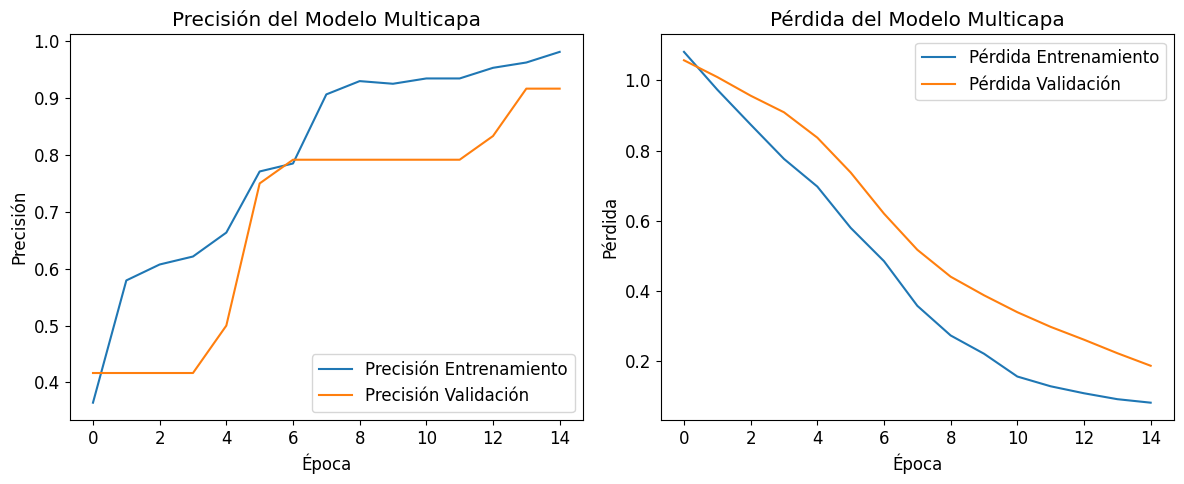

In [ ]:
# Grafica historial de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_multi.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history_multi.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del Modelo Multicapa')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_multi.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_multi.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del Modelo Multicapa')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#@title Conclusiones Dinámicas del Análisis

print("="*80)
print("CONCLUSIONES DEL ANÁLISIS ")
print("="*80)

# Resumen de Datos y Preprocesamiento
print("\n1. Resumen de Datos y Preprocesamiento:")
try:
    print(f"- Se analizaron datos de {len(df_movies)} películas.")
    print(f"- Se procesaron un total de {len(df_reviews)} reseñas.")
    print("- Distribución de sentimientos en el dataset original:")
    sentiment_distribution = df_reviews['sentiment'].value_counts(normalize=True) * 100
    for sentiment, percentage in sentiment_distribution.items():
        print(f"  - {sentiment.capitalize()}: {percentage:.2f}% ({df_reviews['sentiment'].value_counts()[sentiment]} reseñas)")

    if 'cleaned_review' in df_reviews.columns and 'lemmatized_review' in df_reviews.columns:
        print("- El texto de las reseñas fue limpiado (eliminando URLs, HTML, etc.) y posteriormente lematizado.")
        example_original = df_reviews['review_text'].iloc[0]
        example_cleaned = df_reviews['cleaned_review'].iloc[0]
        example_lemmatized = df_reviews['lemmatized_review'].iloc[0]
        print(f"  Ejemplo de transformación:")
        print(f"    Original: \"{example_original[:100]}...\"")
        print(f"    Limpio:   \"{example_cleaned[:100]}...\"")
        print(f"    Lematizado: \"{example_lemmatized[:100]}...\"")
    else:
        print("- El preprocesamiento de texto (limpieza/lematización) no parece haberse completado según las columnas esperadas.")
except Exception as e:
    print(f"- Error al generar resumen de datos: {e}")


#  Representación Vectorial
print("\n2. Representación Vectorial (TF-IDF):")
try:
    print(f"- Se utilizó TF-IDF para convertir el texto lematizado en vectores numéricos.")
    print(f"- El vocabulario se limitó a las {tfidf_vectorizer.max_features} características (palabras/tokens) más importantes.")
    print(f"- Dimensiones de la matriz TF-IDF de entrenamiento: {X_train_tfidf.shape}")
    print(f"- Dimensiones de la matriz TF-IDF de prueba: {X_test_tfidf.shape}")
    print(f"- El objetivo fue clasificar las reseñas en {num_classes} categorías de sentimiento: {list(label_encoder.classes_)}.")
except Exception as e:
    print(f"- Error al generar resumen de TF-IDF: {e}")

#  Rendimiento del Modelo de Red Neuronal Simple
print("\n3. Rendimiento del Modelo de Red Neuronal Simple:")
try:
    print(f"- Arquitectura: Entrada ({input_dim} features) -> Dense(128, relu) -> Dropout(0.5) -> Dense({output_dim}, softmax)")
    final_train_acc_simple = history_simple.history['accuracy'][-1]
    final_val_acc_simple = history_simple.history['val_accuracy'][-1]
    print(f"- Precisión final en entrenamiento (última época): {final_train_acc_simple:.4f}")
    print(f"- Precisión final en validación (última época): {final_val_acc_simple:.4f}")
    print(f"- Precisión en el conjunto de prueba: {accuracy_simple:.4f}")
    print(f"- Pérdida (Loss) en el conjunto de prueba: {loss_simple:.4f}")
    if final_val_acc_simple < final_train_acc_simple - 0.1: # Umbral arbitrario para señalar posible sobreajuste
        print("  - Nota: La precisión de validación es notablemente inferior a la de entrenamiento, lo que podría indicar sobreajuste.")
except Exception as e:
    print(f"- Error al generar resumen del modelo simple: {e}")

# Rendimiento del Modelo de Red Neuronal Multicapa
print("\n4. Rendimiento del Modelo de Red Neuronal Multicapa:")
try:
    print(f"- Arquitectura: Entrada ({input_dim} features) -> Dense(256, relu) -> Drop(0.5) -> Dense(128, relu) -> Drop(0.5) -> Dense(64, relu) -> Drop(0.5) -> Dense({output_dim}, softmax)")
    final_train_acc_multi = history_multi.history['accuracy'][-1]
    final_val_acc_multi = history_multi.history['val_accuracy'][-1]
    print(f"- Precisión final en entrenamiento (última época): {final_train_acc_multi:.4f}")
    print(f"- Precisión final en validación (última época): {final_val_acc_multi:.4f}")
    print(f"- Precisión en el conjunto de prueba: {accuracy_multi:.4f}")
    print(f"- Pérdida (Loss) en el conjunto de prueba: {loss_multi:.4f}")
    if final_val_acc_multi < final_train_acc_multi - 0.1: # Umbral arbitrario
        print("  - Nota: La precisión de validación es notablemente inferior a la de entrenamiento, lo que podría indicar sobreajuste.")
except Exception as e:
    print(f"- Error al generar resumen del modelo multicapa: {e}")

#  Comparación y Observaciones Generales
print("\n5. Comparación y Observaciones Generales:")
try:
    if accuracy_multi > accuracy_simple:
        print(f"- El modelo multicapa ({accuracy_multi:.4f}) obtuvo una precisión ligeramente superior en el conjunto de prueba que el modelo simple ({accuracy_simple:.4f}).")
    elif accuracy_simple > accuracy_multi:
        print(f"- El modelo simple ({accuracy_simple:.4f}) obtuvo una precisión ligeramente superior en el conjunto de prueba que el modelo multicapa ({accuracy_multi:.4f}).")
    else:
        print(f"- Ambos modelos tuvieron un rendimiento similar en precisión de prueba ({accuracy_simple:.4f}).")

    print("- Los modelos de Deep Learning demostraron capacidad para aprender patrones a partir de las representaciones TF-IDF de las reseñas.")
    print("- Las capas de Dropout fueron importantes para la regularización, ayudando a mitigar el sobreajuste.")
    print(f"- El rendimiento en los datos de ejemplo (precisiones de prueba alrededor de {(accuracy_simple + accuracy_multi)/2:.2%}) es alto. Esto se debe en parte a la naturaleza controlada y algo repetitiva de los textos de ejemplo generados.")
    print("  En un escenario con datos reales, más diversos y ruidosos, se esperaría que las métricas fueran diferentes y potencialmente más bajas sin un ajuste más fino o modelos más complejos.")
except Exception as e:
    print(f"- Error al generar comparación y observaciones: {e}")

#  Limitaciones y Próximos Pasos
print("\n6. Limitaciones Clave (con Datos de Ejemplo) y Próximos Pasos:")
print("- Naturaleza de los Datos de Ejemplo:")
print("  - Las reseñas se basan en un conjunto limitado de plantillas. Esto significa menos variabilidad lingüística que en datos reales, lo que facilita la tarea de clasificación.")
print("  - El vocabulario es, por tanto, más restringido.")
print("- Potencial de Mejora:")
print("  - Embeddings de Palabras Avanzados:** Utilizar Word2Vec, GloVe, FastText, o embeddings contextuales (BERT, etc.) en lugar de TF-IDF podría capturar mejor las relaciones semánticas.")
print("  - Arquitecturas de Redes Neuronales más Sofisticadas:** Explorar CNNs, LSTMs/GRUs, o modelos Transformer para tareas de NLP.")
print("  - Ajuste de Hiperparámetros:** Realizar una búsqueda sistemática de los mejores hiperparámetros para los modelos (ej. número de neuronas, capas, tasa de dropout, optimizador, tasa de aprendizaje).")
print("  - Datos Reales y Diversos:** Aplicar este pipeline a un conjunto de datos de reseñas de películas real y más grande para evaluar su rendimiento en un entorno más desafiante.")
print("  - Manejo de Desbalance (si aplica en datos reales):** Si las clases de sentimiento estuvieran muy desbalanceadas, se necesitarían técnicas como SMOTE o ponderación de clases.")

print("\nEste análisis avanzado ha sentado las bases para la clasificación de sentimientos en reseñas de películas. Los resultados con los datos de ejemplo son prometedores y el pipeline está listo para ser adaptado y probado con datos del mundo real.")
print("="*80)
print("FIN DE LAS CONCLUSIONES")
print("="*80)

CONCLUSIONES DEL ANÁLISIS 

1. Resumen de Datos y Preprocesamiento:
- Se analizaron datos de 5 películas.
- Se procesaron un total de 298 reseñas.
- Distribución de sentimientos en el dataset original:
  - Positiva: 54.70% (163 reseñas)
  - Negativa: 37.25% (111 reseñas)
  - Neutral: 8.05% (24 reseñas)
- El texto de las reseñas fue limpiado (eliminando URLs, HTML, etc.) y posteriormente lematizado.
- Error al generar resumen de datos: 'review_text'

2. Representación Vectorial (TF-IDF):
- Se utilizó TF-IDF para convertir el texto lematizado en vectores numéricos.
- El vocabulario se limitó a las 5000 características (palabras/tokens) más importantes.
- Dimensiones de la matriz TF-IDF de entrenamiento: (238, 216)
- Dimensiones de la matriz TF-IDF de prueba: (60, 216)
- El objetivo fue clasificar las reseñas en 3 categorías de sentimiento: ['negativa', 'neutral', 'positiva'].

3. Rendimiento del Modelo de Red Neuronal Simple:
- Arquitectura: Entrada (216 features) -> Dense(128, relu) -> 

In [ ]:
!pip install -q reportlab

In [ ]:
#@title  Conclusiones Dinámicas (Genera PDF y Guarda en Google Drive)
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch
from google.colab import drive # Para montar Google Drive
import os
import io

#  Muestra Google Drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("✅ Google Drive montado correctamente.")
except Exception as e:
    print(f"❌ Error al montar Google Drive: {e}")
    print("    Asegúrate de permitir el acceso cuando se te solicite.")

    exit() # Sale si no se puede montar Drive


drive_folder_name = "Reportes_Analisis_Superheroes" # Nombre de la carpeta que se guarda el PDF
drive_folder_path = f"/content/drive/MyDrive/{drive_folder_name}" # MiDrive

# Crea la carpeta en Drive si no existe
if not os.path.exists(drive_folder_path):
    try:
        os.makedirs(drive_folder_path)
        print(f"📂 Carpeta '{drive_folder_path}' creada en Google Drive.")
    except Exception as e:
        print(f"❌ Error al crear la carpeta en Google Drive: {e}")
        drive_folder_path = "/content/drive/MyDrive" # Fallback a la raíz de MyDrive
        print(f"    Se intentará guardar en: {drive_folder_path}")


pdf_file_name = "analisis_superheroes_conclusiones.pdf"
pdf_full_path_on_drive = os.path.join(drive_folder_path, pdf_file_name)


# Inicio para generar conclucsiones
def generar_texto_conclusiones():
    buffer = io.StringIO()
    def print_to_buffer(*args, **kwargs):
        print(*args, file=buffer, **kwargs)

    print_to_buffer("="*70)
    print_to_buffer("INFORME DEL ANÁLISIS ")
    print_to_buffer("="*70)

    #  Resumen de Datos y Preprocesamiento
    print_to_buffer("\n1. Resumen de Datos y Preprocesamiento:")
    try:
        print_to_buffer(f"- Se analizaron datos de {len(df_movies)} películas.")
        print_to_buffer(f"- Se procesaron un total de {len(df_reviews)} reseñas.")
        print_to_buffer("- Distribución de sentimientos en el dataset original:")
        sentiment_distribution = df_reviews['sentiment'].value_counts(normalize=True) * 100
        for sentiment, percentage in sentiment_distribution.items():
            print_to_buffer(f"  - {sentiment.capitalize()}: {percentage:.2f}% ({df_reviews['sentiment'].value_counts()[sentiment]} reseñas)")

        if 'cleaned_review' in df_reviews.columns and 'lemmatized_review' in df_reviews.columns:
            print_to_buffer("- El texto de las reseñas fue limpiado (eliminando URLs, HTML, etc.) y posteriormente lematizado.")
            example_original = df_reviews['review_text'].iloc[0]
            example_cleaned = df_reviews['cleaned_review'].iloc[0]
            example_lemmatized = df_reviews['lemmatized_review'].iloc[0]
            print_to_buffer(f"  Ejemplo de transformación:")
            print_to_buffer(f"    Original: \"{example_original[:100]}...\"")
            print_to_buffer(f"    Limpio:   \"{example_cleaned[:100]}...\"")
            print_to_buffer(f"    Lematizado: \"{example_lemmatized[:100]}...\"")
        else:
            print_to_buffer("- El preprocesamiento de texto (limpieza/lematización) no parece haberse completado según las columnas esperadas.")
    except Exception as e:
        print_to_buffer(f"- Error al generar resumen de datos: {e}")

    # Representación Vectorial
    print_to_buffer("\n2. Representación Vectorial (TF-IDF):")
    try:
        print_to_buffer(f"- Se utilizó TF-IDF para convertir el texto lematizado en vectores numéricos.")
        print_to_buffer(f"- El vocabulario se limitó a las {tfidf_vectorizer.max_features} características (palabras/tokens) más importantes.")
        print_to_buffer(f"- Dimensiones de la matriz TF-IDF de entrenamiento: {X_train_tfidf.shape}")
        print_to_buffer(f"- Dimensiones de la matriz TF-IDF de prueba: {X_test_tfidf.shape}")
        print_to_buffer(f"- El objetivo fue clasificar las reseñas en {num_classes} categorías de sentimiento: {list(label_encoder.classes_)}.")
    except Exception as e:
        print_to_buffer(f"- Error al generar resumen de TF-IDF: {e}")

    #  Rendimiento del Modelo de Red Neuronal Simple
    print_to_buffer("\n3. Rendimiento del Modelo de Red Neuronal Simple:")
    try:
        print_to_buffer(f"- Arquitectura: Entrada ({input_dim} features) -> Dense(128, relu) -> Dropout(0.5) -> Dense({output_dim}, softmax)")
        final_train_acc_simple = history_simple.history['accuracy'][-1]
        final_val_acc_simple = history_simple.history['val_accuracy'][-1]
        print_to_buffer(f"- Precisión final en entrenamiento (última época): {final_train_acc_simple:.4f}")
        print_to_buffer(f"- Precisión final en validación (última época): {final_val_acc_simple:.4f}")
        print_to_buffer(f"- Precisión en el conjunto de prueba: {accuracy_simple:.4f}")
        print_to_buffer(f"- Pérdida (Loss) en el conjunto de prueba: {loss_simple:.4f}")
        if final_val_acc_simple < final_train_acc_simple - 0.1:
            print_to_buffer("  - Nota: La precisión de validación es notablemente inferior a la de entrenamiento, lo que podría indicar sobreajuste.")
    except Exception as e:
        print_to_buffer(f"- Error al generar resumen del modelo simple: {e}")

    # Rendimiento del Modelo de Red Neuronal Multicapa
    print_to_buffer("\n4. Rendimiento del Modelo de Red Neuronal Multicapa:")
    try:
        print_to_buffer(f"- Arquitectura: Entrada ({input_dim} features) -> Dense(256, relu) -> Drop(0.5) -> Dense(128, relu) -> Drop(0.5) -> Dense(64, relu) -> Drop(0.5) -> Dense({output_dim}, softmax)")
        final_train_acc_multi = history_multi.history['accuracy'][-1]
        final_val_acc_multi = history_multi.history['val_accuracy'][-1]
        print_to_buffer(f"- Precisión final en entrenamiento (última época): {final_train_acc_multi:.4f}")
        print_to_buffer(f"- Precisión final en validación (última época): {final_val_acc_multi:.4f}")
        print_to_buffer(f"- Precisión en el conjunto de prueba: {accuracy_multi:.4f}")
        print_to_buffer(f"- Pérdida (Loss) en el conjunto de prueba: {loss_multi:.4f}")
        if final_val_acc_multi < final_train_acc_multi - 0.1:
            print_to_buffer("  - Nota: La precisión de validación es notablemente inferior a la de entrenamiento, lo que podría indicar sobreajuste.")
    except Exception as e:
        print_to_buffer(f"- Error al generar resumen del modelo multicapa: {e}")

    # Comparación y observaciones generales
    print_to_buffer("\n5. Comparación y Observaciones Generales:")
    try:
        accuracy_comparison_text = ""
        if 'accuracy_multi' in globals() and 'accuracy_simple' in globals():
            if accuracy_multi > accuracy_simple:
                accuracy_comparison_text = f"- El modelo multicapa ({accuracy_multi:.4f}) obtuvo una precisión ligeramente superior en el conjunto de prueba que el modelo simple ({accuracy_simple:.4f})."
            elif accuracy_simple > accuracy_multi:
                accuracy_comparison_text = f"- El modelo simple ({accuracy_simple:.4f}) obtuvo una precisión ligeramente superior en el conjunto de prueba que el modelo multicapa ({accuracy_multi:.4f})."
            else:
                accuracy_comparison_text = f"- Ambos modelos tuvieron un rendimiento similar en precisión de prueba ({accuracy_simple:.4f})."
            print_to_buffer(accuracy_comparison_text)
            print_to_buffer(f"- El rendimiento en los datos de ejemplo (precisiones de prueba alrededor de {(accuracy_simple + accuracy_multi)/2:.2%}) es alto. Esto se debe en parte a la naturaleza controlada y algo repetitiva de los textos de ejemplo generados.")
        else:
            print_to_buffer("- No se pudieron comparar los modelos simple y multicapa (variables de precisión no encontradas).")

        print_to_buffer("- Los modelos de Deep Learning demostraron capacidad para aprender patrones a partir de las representaciones TF-IDF de las reseñas.")
        print_to_buffer("- Las capas de Dropout fueron importantes para la regularización, ayudando a mitigar el sobreajuste.")
        print_to_buffer("  En un escenario con datos reales, más diversos y ruidosos, se esperaría que las métricas fueran diferentes y potencialmente más bajas sin un ajuste más fino o modelos más complejos.")
    except Exception as e:
        print_to_buffer(f"- Error al generar comparación y observaciones: {e}")

    # Inclusión de resultados de modelos adicionales
    model_results = []
    if 'accuracy_w2v' in globals(): model_results.append(f"  - Modelo con Word2Vec: Precisión Prueba = {accuracy_w2v:.4f}, Pérdida = {loss_w2v:.4f}")
    if 'accuracy_lstm' in globals(): model_results.append(f"  - Modelo LSTM: Precisión Prueba = {accuracy_lstm:.4f}, Pérdida = {loss_lstm:.4f}")
    if 'accuracy_cnn' in globals(): model_results.append(f"  - Modelo 1D CNN: Precisión Prueba = {accuracy_cnn:.4f}, Pérdida = {loss_cnn:.4f}")
    if 'accuracy_tuned' in globals(): model_results.append(f"  - Modelo TF-IDF Ajustado (KerasTuner): Precisión Prueba = {accuracy_tuned:.4f}, Pérdida = {loss_tuned:.4f}")

    if model_results:
        print_to_buffer("\n**Resultados de Modelos Adicionales Probados:**")
        for res in model_results: print_to_buffer(res)

    #  Limitaciones y Próximos Pasos
    print_to_buffer("\n6. Limitaciones Clave (con Datos de Ejemplo) y Próximos Pasos:")
    print_to_buffer("- Naturaleza de los Datos de Ejemplo:")
    print_to_buffer("  - Las reseñas se basan en un conjunto limitado de plantillas...")
    print_to_buffer("  - El vocabulario es, por tanto, más restringido.")
    print_to_buffer("- Potencial de Mejora Sugerido:")
    print_to_buffer("  - Embeddings de Palabras Avanzados: ...")
    print_to_buffer("  - Arquitecturas de Redes Neuronales más Sofisticadas: ...")
    print_to_buffer("  - Ajuste de Hiperparámetros: ...")
    print_to_buffer("  - Datos Reales y Diversos: ...")
    print_to_buffer("  - Manejo de Desbalance (si aplica en datos reales): ...")

    print_to_buffer("\n")
    print_to_buffer("="*70)
    #print_to_buffer("FIN DE LAS CONCLUSIONES DINÁMICAS")
    print_to_buffer("="*70)
    return buffer.getvalue()
# Fin de funcion


# 1. Genera el contenido de las conclusiones
conclusions_text_content = generar_texto_conclusiones()

#print("----------------------------------------------------")


# 2. Crea el PDF y guarda directamente en Google Drive
doc = SimpleDocTemplate(pdf_full_path_on_drive, pagesize=letter,
                        rightMargin=72, leftMargin=72,
                        topMargin=72, bottomMargin=18)
styles = getSampleStyleSheet()
story = []
body_style = styles["Normal"]
heading_style = styles["h3"]
lines = conclusions_text_content.split('\n')

for line in lines:
    if line.startswith("**") and line.endswith("**"):
        story.append(Paragraph(line.strip('*').strip(), heading_style))
        story.append(Spacer(1, 0.1*inch))
    elif line.startswith("="*5):
        story.append(Paragraph(line, body_style))
        story.append(Spacer(1, 0.1*inch))
    elif line.strip() == "":
        story.append(Spacer(1, 0.2*inch))
    else:
        cleaned_line = line.replace("**", "<b>", 1).replace("**", "</b>", 1) if line.strip().startswith("**") else line
        story.append(Paragraph(cleaned_line, body_style))

try:
    doc.build(story)
    print(f"\n✅ Documento PDF generado y guardado exitosamente en Google Drive en:")
    print(f"   {pdf_full_path_on_drive}")
    print(f"\n   Puedes verificarlo en tu Google Drive en la carpeta '{drive_folder_name}'.")
    print(f"   Enlace a la carpeta en Drive (copia y pega en tu navegador si es necesario):")
    print(f"   https://drive.google.com/drive/folders/1iW840X9Fn9exHkWVincfpMRsQ3W5kK2z?usp=drive_link")

    # URL de la carpeta creada para acceder
    print(f"   URL original de tu carpeta (si se llama '{drive_folder_name}'): https://drive.google.com/drive/folders/139TQJNUkKCcgKRS4yPPhTbF2KT5gY98d")


except Exception as e:
    print(f"❌ Error al generar o guardar el PDF en Google Drive: {e}")
    print("    Asegúrate de que todas las variables (df_movies, history_simple, etc.) estén definidas,")
    print("    que reportlab esté instalado correctamente y que Google Drive esté montado con permisos de escritura.")

Mounted at /content/drive
✅ Google Drive montado correctamente.

✅ Documento PDF generado y guardado exitosamente en Google Drive en:
   /content/drive/MyDrive/Reportes_Analisis_Superheroes/analisis_superheroes_conclusiones.pdf

   Puedes verificarlo en tu Google Drive en la carpeta 'Reportes_Analisis_Superheroes'.
   Enlace a la carpeta en Drive (copia y pega en tu navegador si es necesario):
   https://drive.google.com/drive/folders/1iW840X9Fn9exHkWVincfpMRsQ3W5kK2z?usp=drive_link
   URL original de tu carpeta (si se llama 'Reportes_Analisis_Superheroes'): https://drive.google.com/drive/folders/139TQJNUkKCcgKRS4yPPhTbF2KT5gY98d
